In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import glm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [97]:
df_main = pd.read_csv('zomato.csv')

In [98]:
df_main.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [99]:
#This data set has some duplicates. E.g. below La Brasserie - Le Meridien is the same restaurant 
#but has multiple listings as Buffet/ Dine-Out and listed_in(city) variable also differs. La Brasserie is listed in
#both Malleshwaram & Lavelle Road. 
df_main[df_main['name']=='La Brasserie - Le Meridien']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
37715,https://www.zomato.com/bangalore/la-brasserie-...,"Le Meridien, 28, Sankey Road, Bangalore",La Brasserie - Le Meridien,No,Yes,4.1 /5,309,080 22262233\n080 22282828,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...","4,100","[('Rated 5.0', 'RATED\n We were here for thei...",[],Buffet,Lavelle Road
39125,https://www.zomato.com/bangalore/la-brasserie-...,"Le Meridien, 28, Sankey Road, Bangalore",La Brasserie - Le Meridien,No,Yes,4.1 /5,309,080 22262233\n080 22282828,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...","4,100","[('Rated 5.0', 'RATED\n We were here for thei...",[],Dine-out,Lavelle Road
39416,https://www.zomato.com/bangalore/la-brasserie-...,"Le Meridien, 28, Sankey Road, Bangalore",La Brasserie - Le Meridien,No,Yes,4.1 /5,309,080 22262233\n080 22282828,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...","4,100","[('Rated 5.0', 'RATED\n We were here for thei...",[],Buffet,Malleshwaram
40262,https://www.zomato.com/bangalore/la-brasserie-...,"Le Meridien, 28, Sankey Road, Bangalore",La Brasserie - Le Meridien,No,Yes,4.1 /5,309,080 22262233\n080 22282828,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...","4,100","[('Rated 5.0', 'RATED\n We were here for thei...",[],Dine-out,Malleshwaram


In [100]:
#Dropping duplicate entries
df_main = df_main.sort_values(by = ['name','address','menu_item'])
df_main = df_main.drop_duplicates(subset = ['name','address'], keep= 'first')

In [101]:
#Cleaning rate column & converting it to float
df_main['rating'] = df_main['rate'].str[0:3]
df_main['rating'] = np.where(df_main['rating']=="NEW", np.nan, df_main['rating'])
df_main['rating'] = np.where(df_main['rating']=="-", np.nan, df_main['rating'])
df_main['rating'] = df_main['rating'].astype(float)

In [102]:
#Cleaning approx cost for 2 people column
df_main['approx_cost(for two people)'] = df_main['approx_cost(for two people)'].str.replace(',','')
df_main['approx_cost(for two people)'] = df_main['approx_cost(for two people)'].fillna(0)
df_main['approx_cost(for two people)'] = df_main['approx_cost(for two people)'].astype(int)

In [103]:
#Finding null values in dataset
df_main.isna().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           2404
votes                             0
phone                           267
location                          9
rest_type                        63
dish_liked                     7870
cuisines                         19
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
rating                         3135
dtype: int64

In [104]:
#Renaming columns
df_main = df_main.rename(columns ={'approx_cost(for two people)':'cost_for_2','listed_in(type)':'meal_type',
                                  'listed_in(city)':'city'})

In [105]:
#Removing null values from cost_for_2 & ratings
df_main.dropna(subset = ['cost_for_2','rating'],inplace =True)
df_main.shape

(9364, 18)

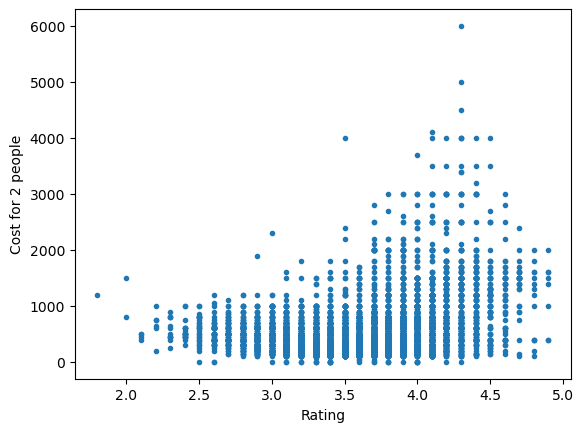

In [106]:
#Do expensive restaurants have good rating.
plt.scatter('rating','cost_for_2',data=df_main, marker = '.')
plt.xlabel('Rating')
plt.ylabel('Cost for 2 people')
plt.show()
#Below graph shows that expensive restaurants tend to have good rating.

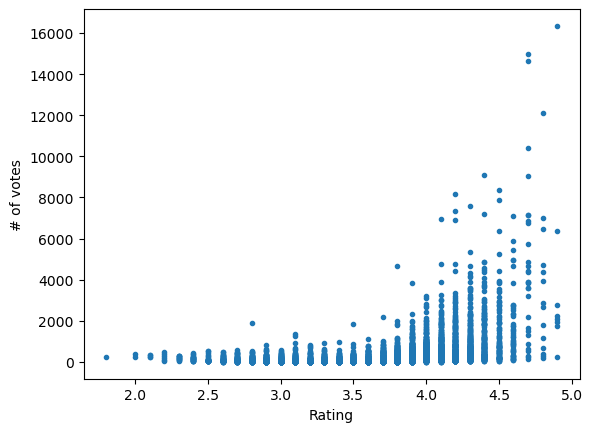

In [107]:
#Do restaurants with high no. of votes have good rating.
plt.scatter('rating','votes',data=df_main,marker = '.')
plt.xlabel('Rating')
plt.ylabel('# of votes')
plt.show()

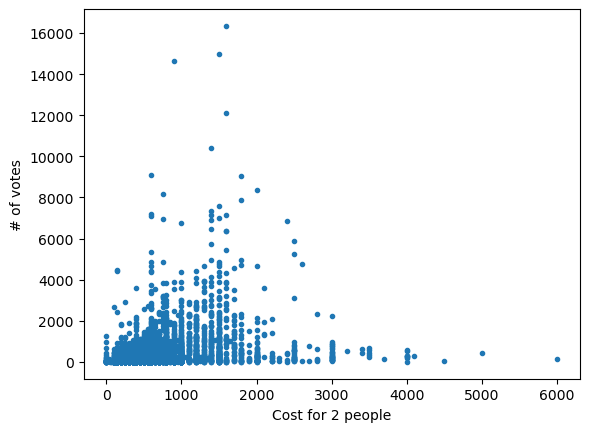

In [108]:
#Are restaurants with low cost has most number of votes
plt.scatter('cost_for_2','votes',data=df_main,marker = '.')
plt.xlabel('Cost for 2 people')
plt.ylabel('# of votes')
plt.show()

In [109]:
df_loc_view = df_main.groupby('location').agg({'rating':'mean','cost_for_2':'median',
                                              'name':'count'}).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

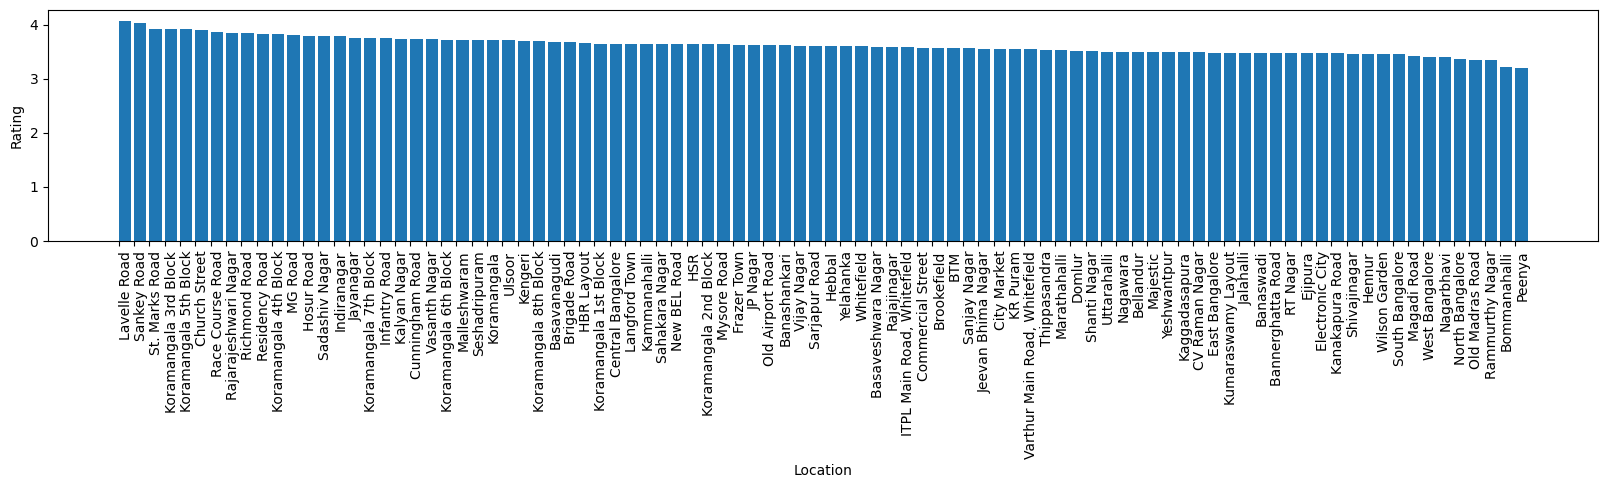

In [110]:
#How do avg. rating vary by location
fig = plt.figure(figsize =(20, 3))
ax= plt.subplot()
plt.bar('location','rating',data =df_loc_view.sort_values(by='rating',ascending = False), align ='edge')
plt.xlabel('Location')
plt.setp(ax.get_xticklabels(), rotation=90, ha='left')
plt.ylabel('Rating')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

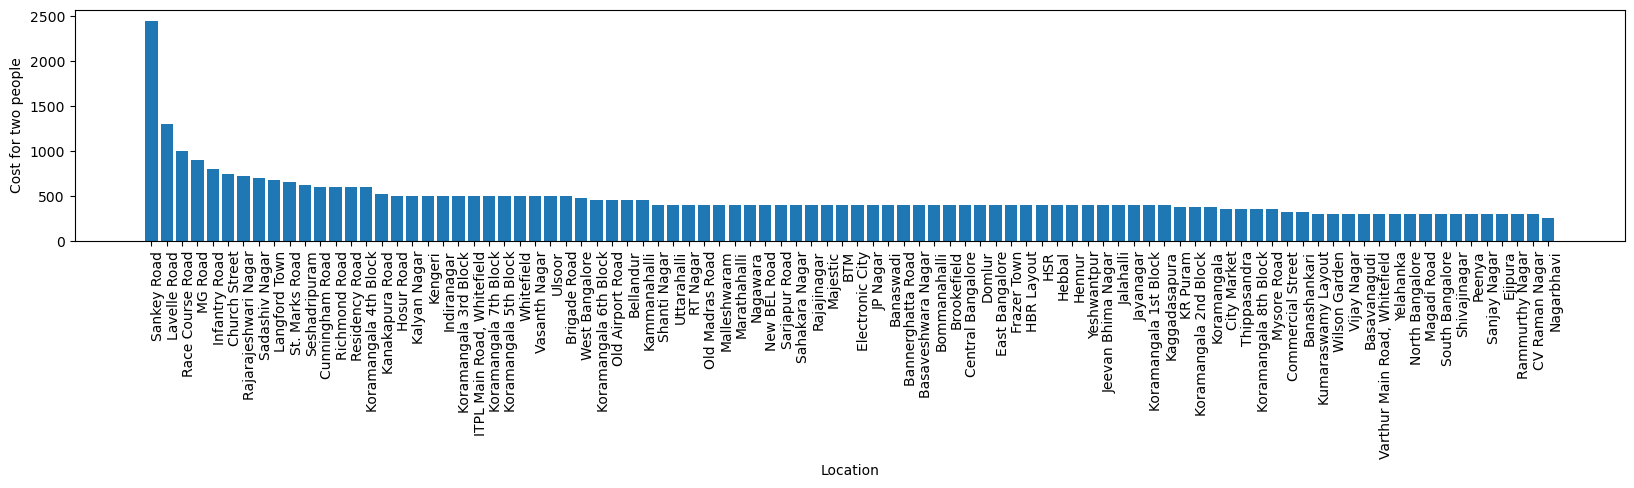

In [111]:
#How do avg. cost for 2 people vary by location
fig = plt.figure(figsize =(20, 3))
ax= plt.subplot()
plt.bar('location','cost_for_2',
        data =df_loc_view.sort_values(by='cost_for_2', ascending = False))
plt.xlabel('Location')
plt.setp(ax.get_xticklabels(), rotation=90, ha='left')
plt.ylabel('Cost for two people')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

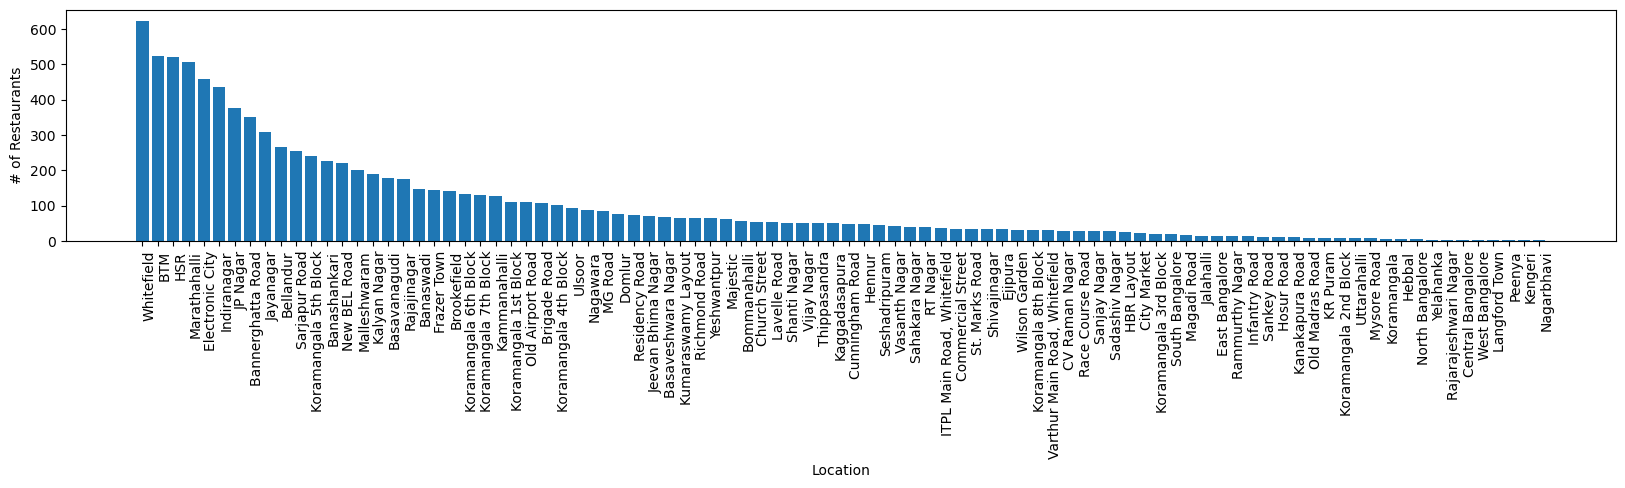

In [112]:
#No. of Restaurants by location
fig = plt.figure(figsize =(20, 3))
ax= plt.subplot()
plt.bar('location','name',
        data =df_loc_view.sort_values(by='name', ascending = False))
plt.xlabel('Location')
plt.setp(ax.get_xticklabels(), rotation=90, ha='left')
plt.ylabel('# of Restaurants')
plt.show

In [113]:
#Create view for restaurant type
df_rest_type_view = df_main.groupby('meal_type').agg({'rating':'mean',
                                                      'cost_for_2':'median',
                                                      'name':'count'}).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

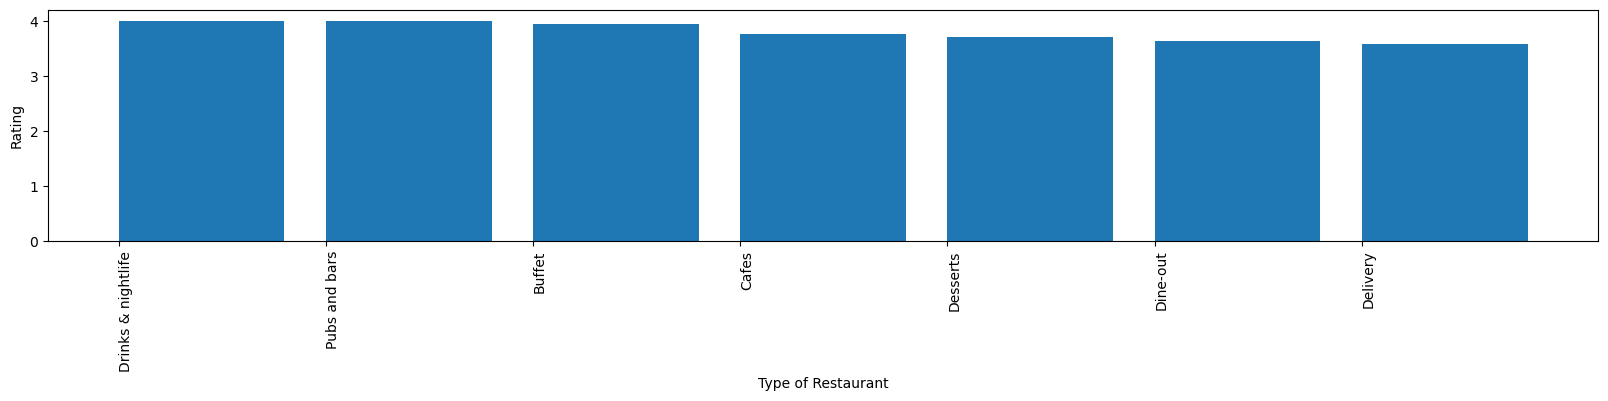

In [114]:
#How do avg. rating vary by restaurant type
fig = plt.figure(figsize =(20, 3))
ax= plt.subplot()
plt.bar('meal_type','rating',
        data =df_rest_type_view.sort_values(by='rating',ascending=False), align ='edge')
plt.xlabel('Type of Restaurant')
plt.setp(ax.get_xticklabels(), rotation=90, ha='left')
plt.ylabel('Rating')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

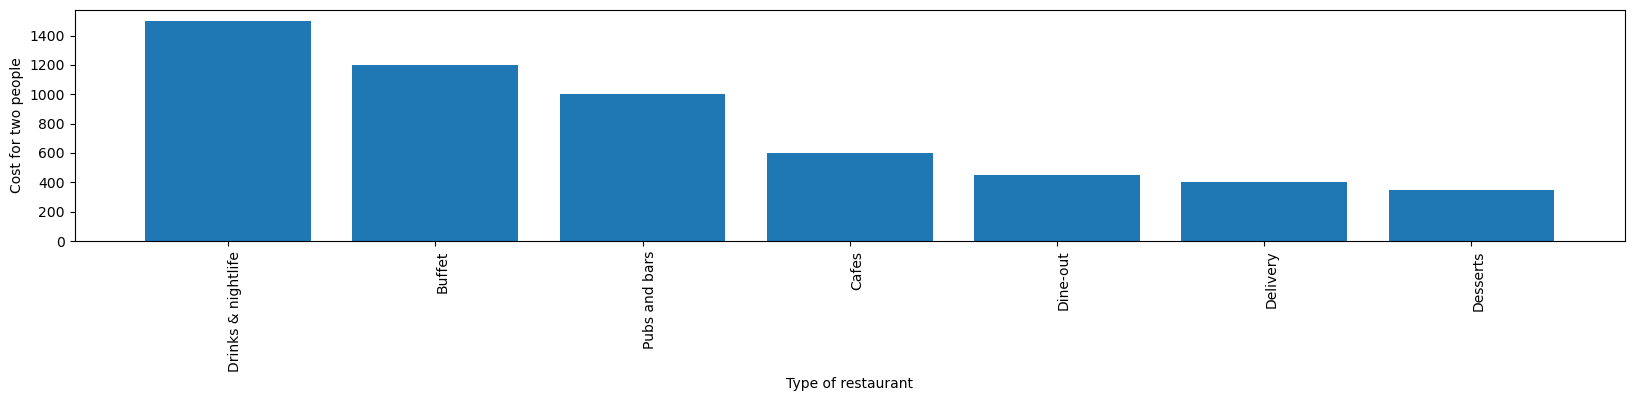

In [115]:
#How do avg. cost for 2 people vary by restaurant type
fig = plt.figure(figsize =(20, 3))
ax= plt.subplot()
plt.bar('meal_type','cost_for_2',
        data =df_rest_type_view.sort_values(by='cost_for_2', ascending = False))
plt.xlabel('Type of restaurant')
plt.setp(ax.get_xticklabels(), rotation=90, ha='left')
plt.ylabel('Cost for two people')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

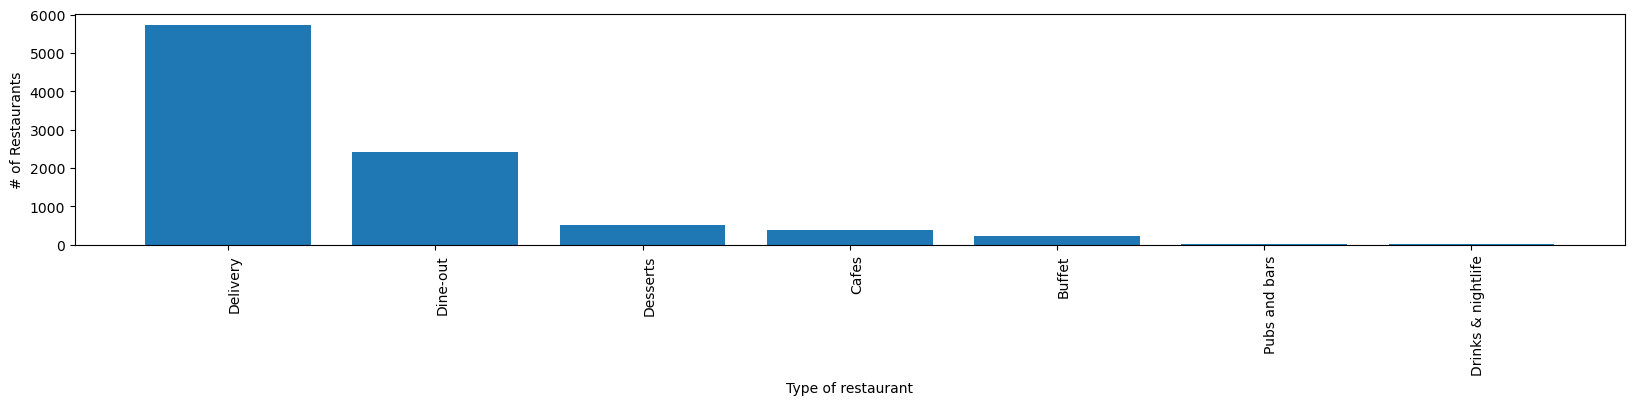

In [116]:
#No. of restaurant by restaurant type
fig = plt.figure(figsize =(20, 3))
ax= plt.subplot()
plt.bar('meal_type','name',
        data =df_rest_type_view.sort_values(by='name', ascending = False))
plt.xlabel('Type of restaurant')
plt.setp(ax.get_xticklabels(), rotation=90, ha='left')
plt.ylabel('# of Restaurants')
plt.show

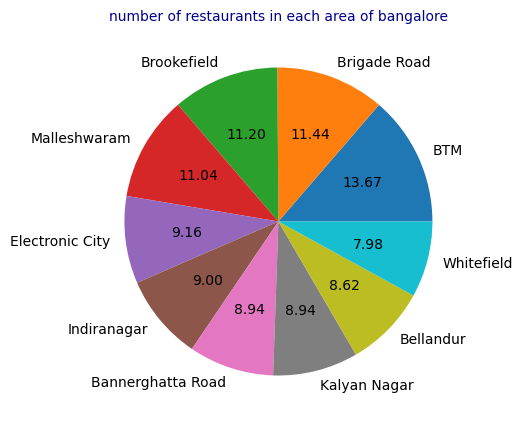

In [117]:
plt.figure(figsize=(5,5))
ax=df_main.city.value_counts()[:10]
labels=df_main['city'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of bangalore',fontsize=10,color='darkblue')
plt.show()

In [118]:
df_main['online_order']= np.where(df_main['online_order']=="Yes",1,0)
df_main['book_table']= np.where(df_main['book_table']=="Yes",1,0)

<Axes: xlabel='online_order', ylabel='cost_for_2'>

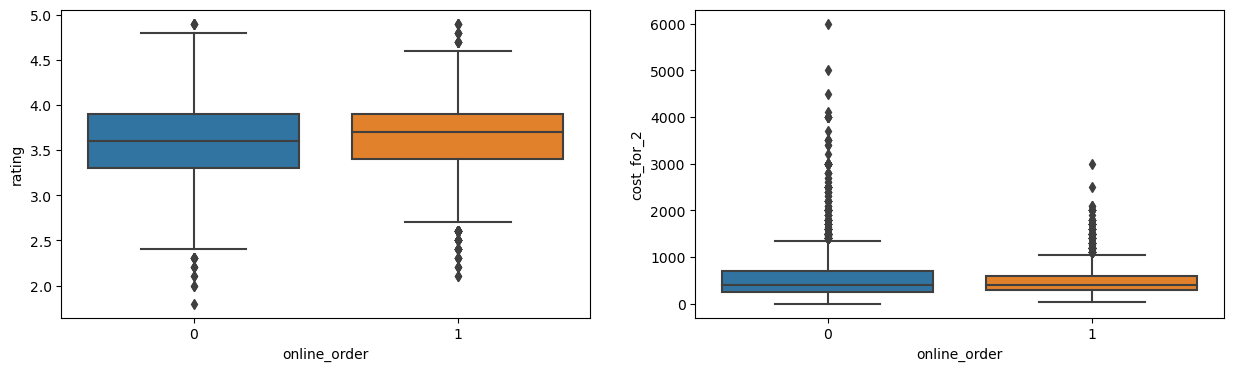

In [119]:
f, axes = plt.subplots(1, 2,figsize = (15,4))
sns.boxplot(data=df_main,y="rating",x="online_order",ax= axes[0])
sns.boxplot(data=df_main,y="cost_for_2",x="online_order",ax=axes[1])

<Axes: xlabel='book_table', ylabel='cost_for_2'>

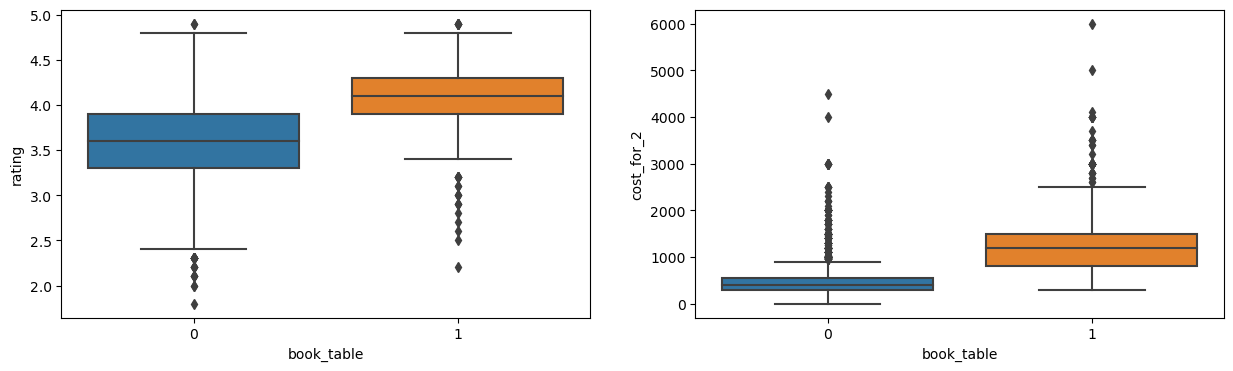

In [120]:
f, axes = plt.subplots(1, 2,figsize = (15,4))
sns.boxplot(data=df_main,y="rating",x="book_table",ax= axes[0])
sns.boxplot(data=df_main,y="cost_for_2",x="book_table",ax=axes[1])

In [121]:
df_main=df_main.drop(['url','address','name','rate','phone','dish_liked','cuisines',
            'reviews_list','menu_item'],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [136]:
list1=['online_order','book_table','rest_type','meal_type','city']
for i in list1:
    df_main[i]=le.fit_transform(df_main[i])

df_main.head()

,online_order,book_table,votes,location,rest_type,cost_for_2,meal_type,city,rating,pred_rating_glm1,resid_glm1,pred_rating_glm2,resid_glm2
4321,0,0,7,Bellandur,73,200,2,4,3.4,3.352877,-0.047123,3.351729,-0.048271
10182,1,0,48,HSR,73,400,2,0,3.9,3.570618,-0.329382,3.567699,-0.332301
885,1,0,37,Bannerghatta Road,16,400,1,2,3.7,3.558596,-0.141404,3.556947,-0.143053
19901,1,0,49,Koramangala 5th Block,73,300,2,13,3.2,3.721384,0.521384,3.715653,0.515653
10514,0,0,41,BTM,24,450,4,0,3.7,3.454410,-0.245590,3.451422,-0.248578


In [137]:
#Building a Linear Regression model to predict restaurant rating. 
#Restaurant rating are discrete values on scale of 5. Most values are between 4-5. Assuming Poisson distribution here.
model_formula  = 'rating ~ online_order + book_table + votes + location + meal_type + cost_for_2 + meal_type + city'

#link function
link_function = sm.families.links.log()
model_family = sm.families.Poisson(link = link_function)

#model
rating_fit = glm(formula = model_formula, 
                 data = df_main, 
                 family = model_family).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [138]:
rating_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 rating   No. Observations:                 9364
Model:                            GLM   Df Residuals:                     9266
Model Family:                 Poisson   Df Model:                           97
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15001.
Date:                Fri, 26 May 2023   Deviance:                       361.71
Time:                        21:27:25   Pearson chi2:                     352.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01330
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.2355      0.029     42.489      0.000       1.178       1.292
location[T.Banashankari]                      0.0200      0.042      0.476      0.634      -0.063       0.103
location[T.Banaswadi]                        -0.0217      0.050     -0.431      0.667      -0.120       0.077
location[T.Bannerghatta Road]                -0.0278      0.037     -0.752      0.452      -0.100       0.045
location[T.Basavanagudi]                      0.0363      0.046      0.797      0.426      -0.053       0.126
location[T.Basaveshwara Nagar]                0.0032      0.070      0.046      0.963      -0.134       0.141
location[T.Bellandur]                        -0.0258      0.040     -0.638      0.523      -0.105       0.053
location[T.Bommanahalli]                     -0.1002      0.079     -1.274      0.203      -0.254       0.054
location[T.Brigade Road]                      0.0065      0.055      0.117      0.907      -0.102       0.115
location[T.Brookefield]                      -0.0092      0.050     -0.182      0.856      -0.108       0.090
location[T.CV Raman Nagar]                   -0.0229      0.103     -0.224      0.823      -0.224       0.178
location[T.Central Bangalore]                 0.0232      0.371      0.062      0.950      -0.704       0.750
location[T.Church Street]                     0.0322      0.073      0.440      0.660      -0.111       0.175
location[T.City Market]                       0.0128      0.118      0.109      0.913      -0.219       0.245
location[T.Commercial Street]                 0.0137      0.094      0.146      0.884      -0.170       0.198
location[T.Cunningham Road]                   0.0154      0.079      0.195      0.846      -0.140       0.171
location[T.Domlur]                           -0.0263      0.066     -0.397      0.691      -0.156       0.103
location[T.East Bangalore]                   -0.0218      0.140     -0.155      0.877      -0.297       0.254
location[T.Ejipura]                          -0.0204      0.095     -0.214      0.830      -0.207       0.166
location[T.Electronic City]                  -0.0312      0.034     -0.911      0.363      -0.098       0.036
location[T.Frazer Town]                       0.0209      0.050      0.422      0.673      -0.076       0.118
location[T.HBR Layout]                        0.0204      0.107      0.190      0.849      -0.190       0.231
location[T.HSR]                               0.0086      0.033      0.261      0.794      -0.056       0.073
location[T.Hebbal]                            0.0107      0.265      0.040      0.968      -0.509       0.530
location[T.Hennur]                           -0.0347      0.082     -0.423      0.672      -0.195       0.126
loc

In [139]:
df_main['pred_rating_glm1'] = rating_fit.fittedvalues
df_main['pred_rating_glm1']= np.where(df_main['pred_rating_glm1']>5,5,df_main['pred_rating_glm1'])
df_main['resid_glm1'] = df_main['pred_rating_glm1']-df_main['rating']

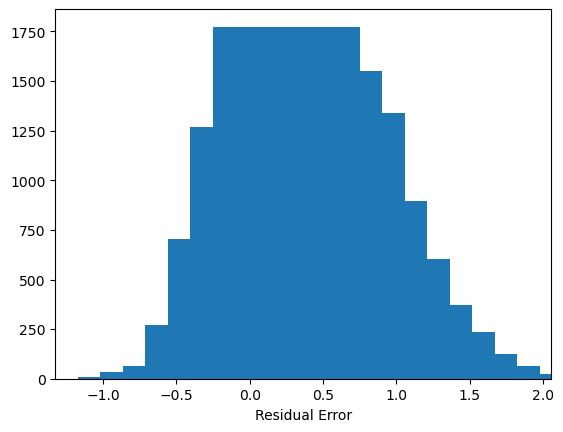

In [140]:
#Plotting difference between predicted ratings & actual ratings
plt.hist(df_main['resid_glm1'],width=1,bins=20)
plt.xlabel('Residual Error')
plt.show()
#Looking at the graph we can see residual error is concentrated between -1 - 1.
#There are sizeable number of predictions where residual is between 3-4. These are mainly cases where actual rating
# was 0 as the restuarant was new and we have predicted best fit rating for these cases.

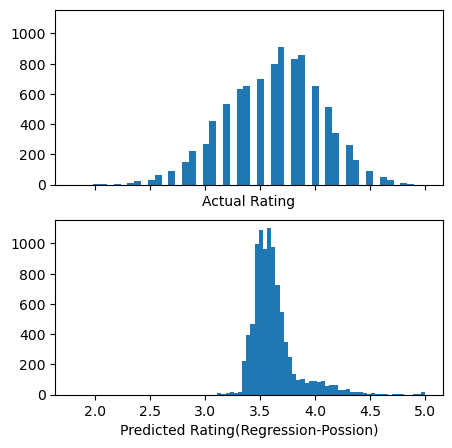

In [141]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex = True, sharey= True)
ax[0].hist('rating',data = df_main,bins = 50)
ax[0].set_xlabel('Actual Rating')
ax[1].hist('pred_rating_glm1',data= df_main, bins = 50)
ax[1].set_xlabel('Predicted Rating(Regression-Possion)')
plt.show()

In [126]:
print('Variance: ',round(np.var(df_main['rating']),2))
print('Mean: ', round(np.mean(df_main['rating']),2))

Variance:  0.19
Mean:  3.63


In [127]:
#Building a Linear Regression model to predict restaurant rating. 
#Restaurant rating are discrete values on scale of 5. Most values are between 4-5. Assuming Poisson distribution here.
model_formula  = 'rating ~ online_order + book_table + votes + location + meal_type + cost_for_2 + meal_type + city'

#link function
link_function = sm.families.links.log()
model_family = sm.families.NegativeBinomial()

#model
rating_fit2 = glm(formula = model_formula, 
                 data = df_main, 
                 family = model_family).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [128]:
rating_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 rating   No. Observations:                 9364
Model:                            GLM   Df Residuals:                     9233
Model Family:        NegativeBinomial   Df Model:                          130
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22599.
Date:                Fri, 26 May 2023   Deviance:                       78.825
Time:                        21:26:41   Pearson chi2:                     74.9
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003016
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.2237      0.100     12.249      0.000       1.028       1.420
location[T.Banashankari]                      0.0153      0.138      0.111      0.912      -0.256       0.286
location[T.Banaswadi]                        -0.0272      0.238     -0.114      0.909      -0.494       0.440
location[T.Bannerghatta Road]                -0.0197      0.105     -0.188      0.851      -0.225       0.186
location[T.Basavanagudi]                      0.0354      0.129      0.274      0.784      -0.218       0.289
location[T.Basaveshwara Nagar]               -0.0009      0.267     -0.003      0.997      -0.524       0.523
location[T.Bellandur]                        -0.0449      0.161     -0.278      0.781      -0.361       0.271
location[T.Bommanahalli]                     -0.0947      0.167     -0.568      0.570      -0.421       0.232
location[T.Brigade Road]                     -0.0114      0.184     -0.062      0.950      -0.372       0.349
location[T.Brookefield]                      -0.0133      0.209     -0.064      0.949      -0.422       0.396
location[T.CV Raman Nagar]                   -0.0209      0.253     -0.082      0.934      -0.517       0.475
location[T.Central Bangalore]                 0.0305      0.814      0.038      0.970      -1.565       1.626
location[T.Church Street]                     0.0119      0.213      0.056      0.956      -0.406       0.430
location[T.City Market]                       0.0112      0.269      0.042      0.967      -0.517       0.539
location[T.Commercial Street]                -0.0046      0.243     -0.019      0.985      -0.481       0.472
location[T.Cunningham Road]                   0.0014      0.221      0.006      0.995      -0.431       0.434
location[T.Domlur]                           -0.0270      0.172     -0.157      0.875      -0.365       0.311
location[T.East Bangalore]                   -0.0190      0.323     -0.059      0.953      -0.651       0.613
location[T.Ejipura]                          -0.0255      0.207     -0.123      0.902      -0.431       0.380
location[T.Electronic City]                   0.0281      0.448      0.063      0.950      -0.850       0.907
location[T.Frazer Town]                       0.0094      0.182      0.052      0.959      -0.346       0.365
location[T.HBR Layout]                        0.0129      0.323      0.040      0.968      -0.620       0.646
location[T.HSR]                               0.0056      0.089      0.063      0.950      -0.169       0.180
location[T.Hebbal]                            0.0079      0.624      0.013      0.990      -1.216       1.231
location[T.Hennur]                           -0.0404      0.280     -0.144      0.885      -0.590       0.509
loc

In [129]:
df_main['pred_rating_glm2'] = rating_fit2.fittedvalues
df_main['pred_rating_glm2']= np.where(df_main['pred_rating_glm2']>5,5,df_main['pred_rating_glm2'])
df_main['resid_glm2'] = df_main['pred_rating_glm2']-df_main['rating']

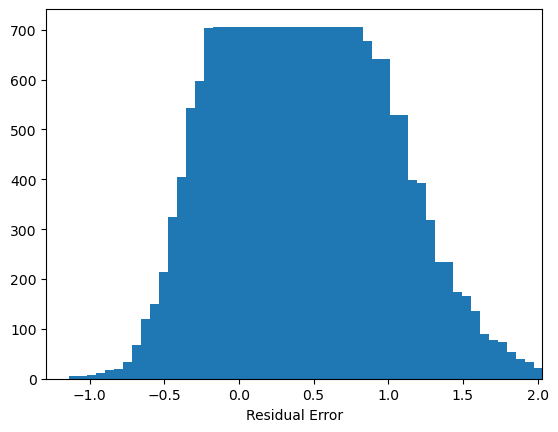

In [130]:
#Plotting difference between predicted ratings & actual ratings
plt.hist(df_main['resid_glm2'],width=1,bins=50)
plt.xlabel('Residual Error')
plt.show()
#Looking at the graph we can see residual error is concentrated between -1 - 1.
#There are sizeable number of predictions where residual is between 3-4. These are mainly cases where actual rating
# was 0 as the restuarant was new and we have predicted best fit rating for these cases.

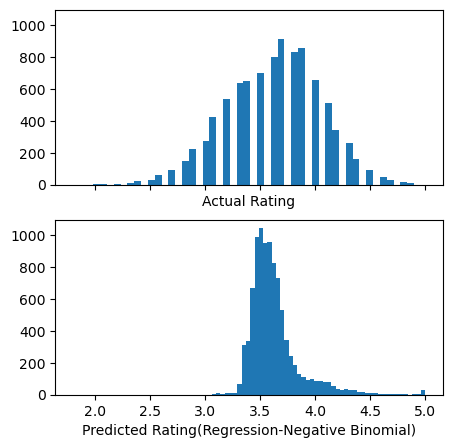

In [131]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex = True, sharey= True)
ax[0].hist('rating',data = df_main,bins = 50)
ax[0].set_xlabel('Actual Rating')
ax[1].hist('pred_rating_glm2',data= df_main, bins = 50)
ax[1].set_xlabel('Predicted Rating(Regression-Negative Binomial)')
plt.show()

In [132]:
print('Variance: ',round(np.var(df_main['pred_rating_glm2']),2))
print('Mean: ', round(np.mean(df_main['pred_rating_glm2']),2))

Variance:  0.05
Mean:  3.62


In [133]:
rating_fit2.pearson_chi2/rating_fit2.df_resid

0.008113898199809986

In [134]:
print('mean_resid_glm1: ',round(np.mean(df_main['resid_glm1']),3))
print('mean_resid_glm2: ',round(np.mean(df_main['resid_glm2']),3))

mean_resid_glm1:  -0.001
mean_resid_glm2:  -0.001


<Axes: ylabel='resid_glm2'>

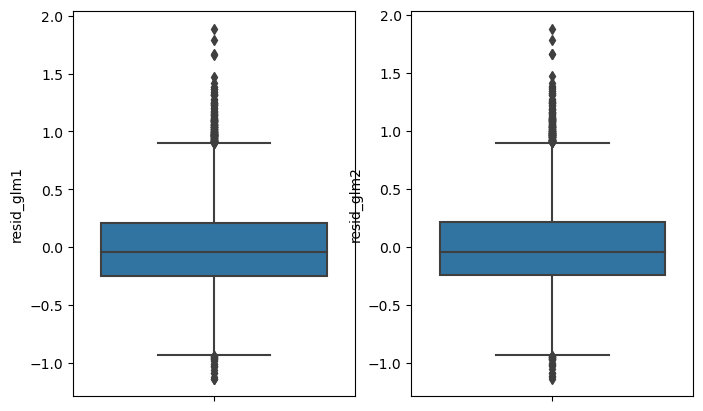

In [135]:
#sns.boxplot(df_main['resid_glm1'])
f, axes = plt.subplots(1, 2,figsize = (8,5))
sns.boxplot(data=df_main,y="resid_glm1",ax= axes[0])
sns.boxplot(data=df_main,y="resid_glm2",ax=axes[1])